In [22]:
import regex
import re
from datasets import load_dataset
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

In [23]:
dataset = load_dataset("clarin-knext/fiqa-pl", 'corpus')
dataset

Found cached dataset fiqa-pl (C:/Users/Macie/.cache/huggingface/datasets/clarin-knext___fiqa-pl/corpus/0.0.0/bada00640881ee3fd04c3b88df9edd435616d17e0a46faf05e63063858742140)


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    corpus: Dataset({
        features: ['_id', 'title', 'text'],
        num_rows: 57638
    })
})

In [24]:
df=pd.DataFrame(dataset['corpus'])["text"]
df

0        Nie mówię, że nie podoba mi się też pomysł szk...
1        Tak więc nic nie zapobiega fałszywym ocenom po...
2        Nigdy nie możesz korzystać z FSA dla indywidua...
3        Samsung stworzył LCD i inne technologie płaski...
4        Oto wymagania SEC: Federalne przepisy dotycząc...
                               ...                        
57633    >Cóż, po pierwsze, drogi to coś więcej niż hob...
57634    Tak, robią. Na dotacje dla firm farmaceutyczny...
57635    >To bardzo smutne, że nie rozumiesz ludzkiej n...
57636    „Czy Twój CTO pozwolił dużej grupie użyć „„adm...
57637    Zapewnienie rządowi większej kontroli nad dyst...
Name: text, Length: 57638, dtype: object

# Devise two regular expressions

In [307]:
def extract_times(text):
    expression = r'(([01]?[0-9]|[2][0-3])[:][0-5][0-9])'
    return re.findall(expression,text)

def extract_dates(text):
    #pattern1=r'(0?[1-9]|[1-2][0-9]|3[0-1])\s+(stycznia|lutego|marca|kwietnia|maja|czerwca|lipca|sierpnia|września|października|listopada|grudnia)'
    pattern1=r'(\d{1,2})\s+(stycznia|lutego|marca|kwietnia|maja|czerwca|lipca|sierpnia|września|października|listopada|grudnia)'
    pattern2 = r'(\d{2}-\d{2}-\d{4})' # DD-MM-YYYY
    pattern3 = r'(\d{4}-\d{2}-\d{2})' # YYYY-MM-DD
    pattern4 = r'(\d{2}/\d{2}/\d{4})' # DD/MM/YYYY
    pattern5 = r'(\d{4}/\d{2}/\d{2})' # YYYY/MM/DD
    return re.findall(pattern1, text, re.IGNORECASE)+re.findall(pattern2, text, re.IGNORECASE)+re.findall(pattern3, text, re.IGNORECASE)+re.findall(pattern4, text, re.IGNORECASE)+re.findall(pattern5, text, re.IGNORECASE)

# Search for occurrences of times and dates in the dataset.

In [305]:
ex_times=df.apply(extract_times)
times=ex_times[ex_times.apply(lambda x: len(x)>0)]
times

49       [(17:57, 17), (17:57, 17)]
137                     [(6:17, 6)]
165      [(20:00, 20), (17:00, 17)]
191                   [(22:00, 22)]
264                   [(12:00, 12)]
                    ...            
55860    [(15:04, 15), (15:04, 15)]
55867    [(16:00, 16), (16:00, 16)]
56143                 [(10:17, 10)]
56348                   [(5:53, 5)]
56444                 [(06:18, 06)]
Name: text, Length: 306, dtype: object

In [308]:
ex_dates=df.apply(extract_dates)
dates=ex_dates[ex_dates.apply(lambda x: len(x)>0)]
dates

6        [(1, czerwca), (1, sierpnia), (1, sierpnia)]
49                           [2017-10-06, 2017-10-06]
75                    [(2, kwietnia), (30, kwietnia)]
87                           [2017/09/09, 2009/07/09]
105                      [(1, grudnia), (1, grudnia)]
                             ...                     
57360                                 [(1, stycznia)]
57448                      [(4, lutego), (31, marca)]
57529                                    [2017-06-21]
57570                             [(3, października)]
57591                                    [2010/11/10]
Name: text, Length: 1501, dtype: object

# Plot results from point 2:



## for times create a bar plot for full hours.

In [313]:
full_hours_dict = defaultdict(lambda:0)

for row in times:
    for element in row:
        if ":" in element[0]:
            hour=int(element[0].split(":")[0])
            full_hours_dict[hour] += 1

<BarContainer object of 24 artists>

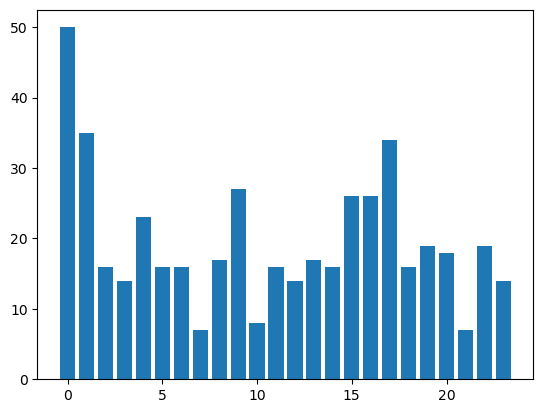

In [314]:
plt.bar(full_hours_dict.keys(),full_hours_dict.values())

In [311]:
month_mapping = {
    1: 'sty',
    2: 'lut',
    3: 'mar',
    4: 'kwi',
    5: 'maj',
    6: 'cze',
    7: 'lip',
    8: 'sie',
    9: 'wrz',
    10: 'paź',
    11: 'lis',
    12: 'gru'
}

months_dict = defaultdict(lambda: 0)

for row in dates:
    for element in row:
        if isinstance(element,tuple):
            month_name = element[1][:3].lower()
            for key, value in month_mapping.items():
                if value == month_name:
                    months_dict[value] += 1
   
        if "/" in element or "-" in element:
            test.append(count)
            month =int(re.split(r'[/-]', element)[1])
            if month in month_mapping:
                test.append(count)
                months_dict[month_mapping[month]] += 1
                
sorted_months_dict = {month: months_dict[month] for month in list(month_mapping.values())}     

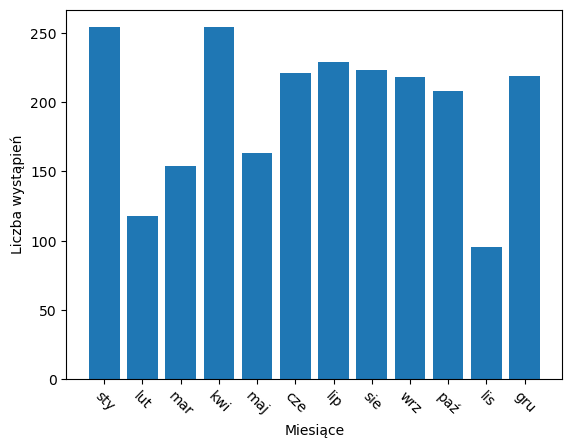

In [319]:
plt.bar(sorted_months_dict.keys(), sorted_months_dict.values())
plt.xlabel('Miesiące')
plt.ylabel('Liczba wystąpień')
plt.xticks(rotation=315)
plt.show()

# Compute the number of occurrences of styczeń word in any inflectional form. Use a compact form for the query (i.e. joining all forms of the word by alternative is forbidden).

In [320]:
#użyto chatugpt do wygenerowania
def count_matches(texts, pattern):
    matches: pd.Series = texts.apply(lambda x: regex.findall(pattern, x, re.IGNORECASE))
    filtered_matches = matches[matches.apply(lambda x: len(x)>0)]
    count = 0
    for match_list in filtered_matches:
        for match in match_list:
            count += 1
    return count

In [321]:
only_styczen=count_matches(df, '(stycz(eń|nia|niowi|niem|niu|nie|niów|ni|niom|niami|niach))')
only_styczen

955

# As in 4, but preceded by a number and a space.

In [322]:
styczen_and_number = count_matches(df, '(((0?[1-9]|[1-2][0-9]|3[0-1]) )stycz(eń|nia|niowi|niem|niu|nie|niów|ni|niom|niami|niach))')
styczen_and_number

215

# As in 4, but not preceded by a number and a space. Check if the results from 5 and 6 sum to 4.

In [324]:
styczen_and_not_number_and_space = count_matches(df, '((?<!((0?[1-9]|[1-2][0-9]|3[0-1]) ))stycz(eń|nia|niowi|niem|niu|nie|niów|ni|niom|niami|niach))')
styczen_and_not_number_and_space

740

In [326]:
styczen_and_number+styczen_and_not_number_and_space==only_styczen

True

## Are regular expressions good at capturing times?

Regular expressions are quite good at capturing times. In our case it was simple format of time and it
wasn't difficult to find patterns. Maybe with different formatting, this task would be much harder.

## Are regular expressions good at capturing dates?

Dates have simple formatting, so u can say that regular expressions are good at capturing dates. The only difficulty is 
when some documents have some signs or other nomenclature, which are simmilar to date formats or context indicates on 
something different than date.

## How one can be sure that the expression has matched all and only the correct expressions of a given type?

u cannot be 100% sure. For example in the given task, there were some examples that weren't dates, but it was difficult to 
extract them from large amount of data. You just have to assume that there are always some mismatched expressions.